In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas

%matplotlib inline

In [41]:
indexSet='ecCombinedDmiSam'

In [3]:
annualCompoundsXr=xarray.open_dataset('results/cmip6EcCompounds.nc')


In [4]:
piControlXr=annualCompoundsXr.sel(experiment='piControl', drop=True)
experimentXr=annualCompoundsXr.sel(experiment='ssp585',year=slice(1850,2099), drop=True)

# Compound in 30 year overlapping bins

In [5]:
expBinSumXr=overlapBins.binSum(experimentXr)

In [26]:
expBinSumXr[indexSet].to_dataset('compound')

<xarray.Dataset>
Dimensions:      (fire: 2, model: 38, year: 22)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * fire         (fire) object 'pos' 'neg'
  * year         (year) int64 1865 1875 1885 1895 1905 ... 2045 2055 2065 2075
Data variables:
    nEvents      (year, fire, model) float64 27.0 10.0 19.0 ... 39.0 36.0 32.0
    all3         (year, fire, model) float64 2.0 0.0 0.0 0.0 ... 1.0 0.0 0.0 0.0
    enso+iod     (year, fire, model) float64 2.0 0.0 2.0 1.0 ... 0.0 0.0 0.0 0.0
    enso+sam     (year, fire, model) float64 2.0 1.0 1.0 2.0 ... 10.0 6.0 2.0
    iod+sam      (year, fire, model) float64 1.0 1.0 0.0 1.0 ... 0.0 0.0 0.0 0.0
    enso         (year, fire, model) float64 0.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    iod          (year, fire, model) float64 2.0 1.0 2.0 3.0 ... 0.0 0.0 0.0 0.0
    sam          (year, fire, model) float64 9.0 4.0 10.0 7.0 ... 19.0 24.0 28.0
    anyCompound  (year, fire, model) float64 7.0 2.0 3.0 4.0 ... 10.0 6.0 2.0

In [8]:
climatList = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        piCModelXr=piControlXr.sel(model=iModel)
        
        binSumXr=overlapBins.binSum(piCModelXr.where(piCModelXr.isnull()==False, drop=True))
        
        climatList.append(binSumXr)
        
    except Exception as e:
        print(e)
        
piControlBinSumXr = xarray.concat(climatList, 'model')

ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
BCC-CSM2-MR
CAMS-CSM1-0
CAS-ESM2-0
CESM2
CESM2-WACCM
CIESM
CMCC-CM2-SR5
CMCC-ESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
CanESM5-CanOE
EC-Earth3
EC-Earth3-CC
EC-Earth3-Veg
EC-Earth3-Veg-LR
FIO-ESM-2-0
GFDL-CM4
GFDL-ESM4
GISS-E2-1-G
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MCM-UA-1-0
MIROC-ES2L
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NESM3
NorESM2-LM
NorESM2-MM
UKESM1-0-LL


In [19]:
%run utils/emergence.ipynb

# Time of emergence - fire Pos

ecCombinedDmiSam


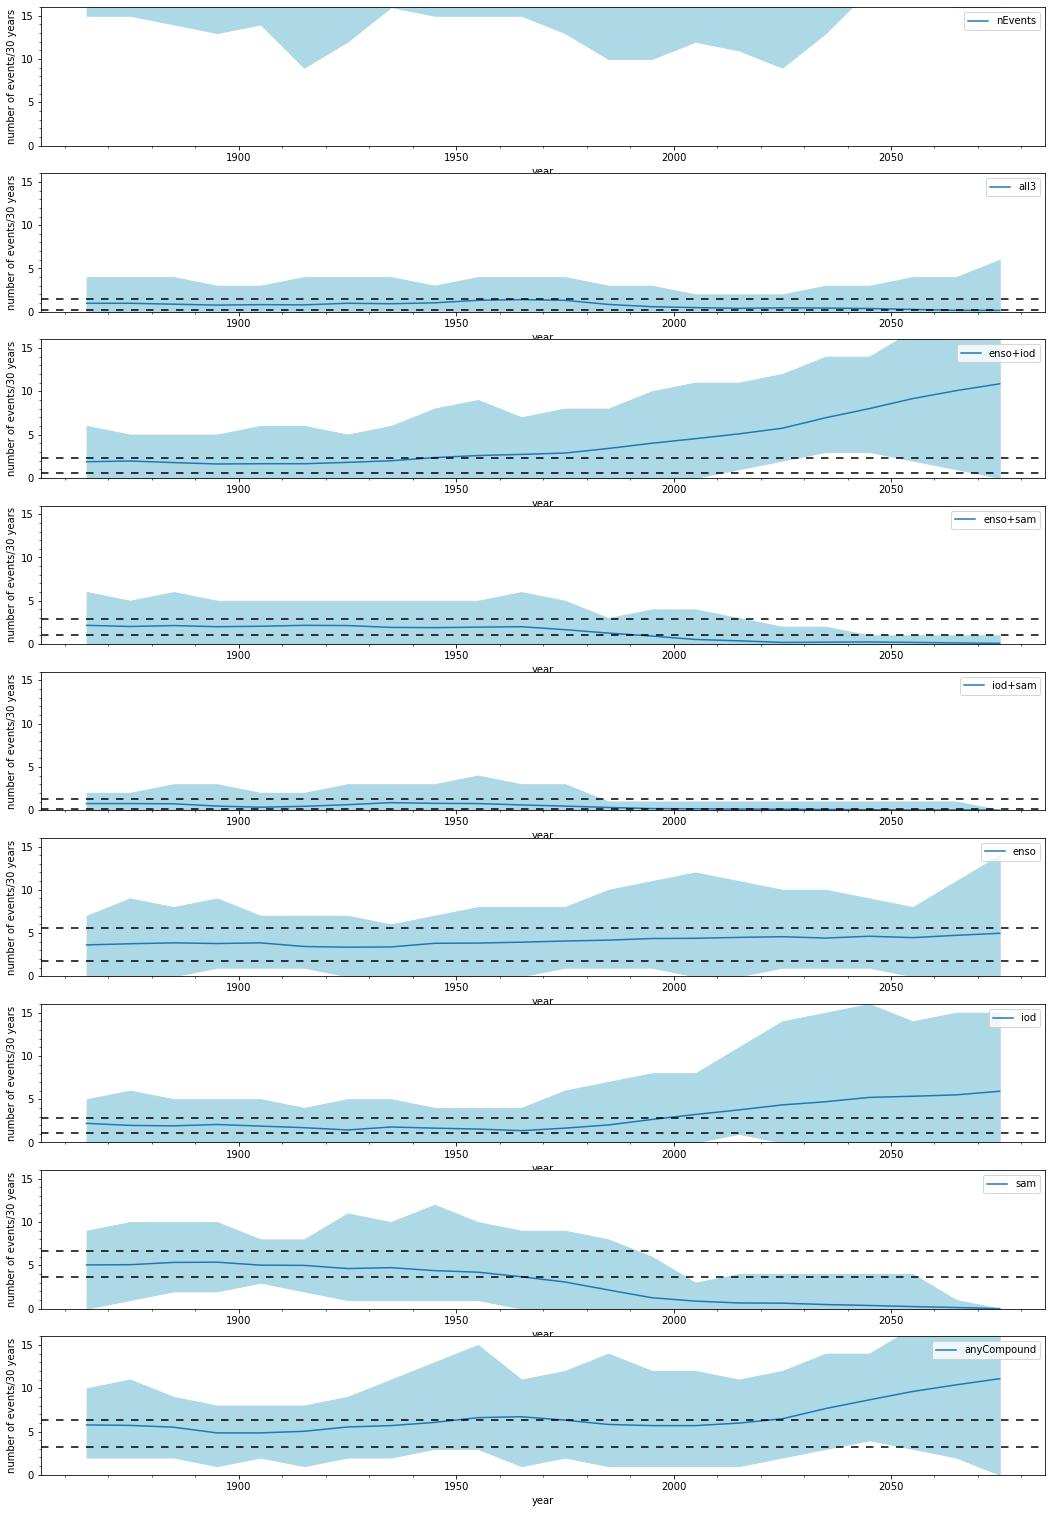

In [42]:
print (indexSet)

emergePlot(expBinSumXr[indexSet].sel(fire='pos', drop=True).to_dataset('compound'),
           piControlBinSumXr[indexSet].sel(fire='pos', drop=True).to_dataset('compound')
          )

Is there a difference in emergence between enso indices?

In [37]:
ensoName={'nino34DmiSam':'nino34+dmi',
          #'nino4DmiSam':'nino4+dmi',
          'ecCombinedDmiSam': 'ecCombined+dmi',
         'cIndexDmiSam':'cIndex+dmi',
          'eIndexDmiSam':'eIndex+dmi'}

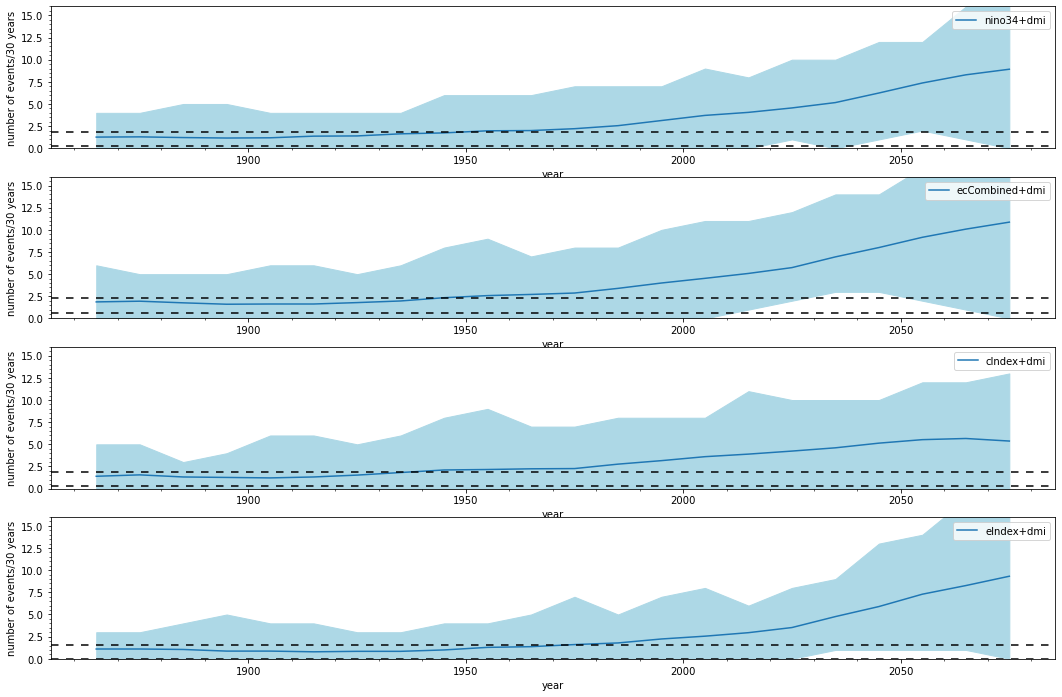

In [39]:
emergePlot(
expBinSumXr[list(ensoName.keys())].sel(compound='enso+iod',fire='pos',drop=True).rename_vars(ensoName),
piControlBinSumXr[list(ensoName.keys())].sel(compound='enso+iod',fire='pos',drop=True).rename_vars(ensoName))

# Time of emergence - Fire Neg

ecCombinedDmiSam


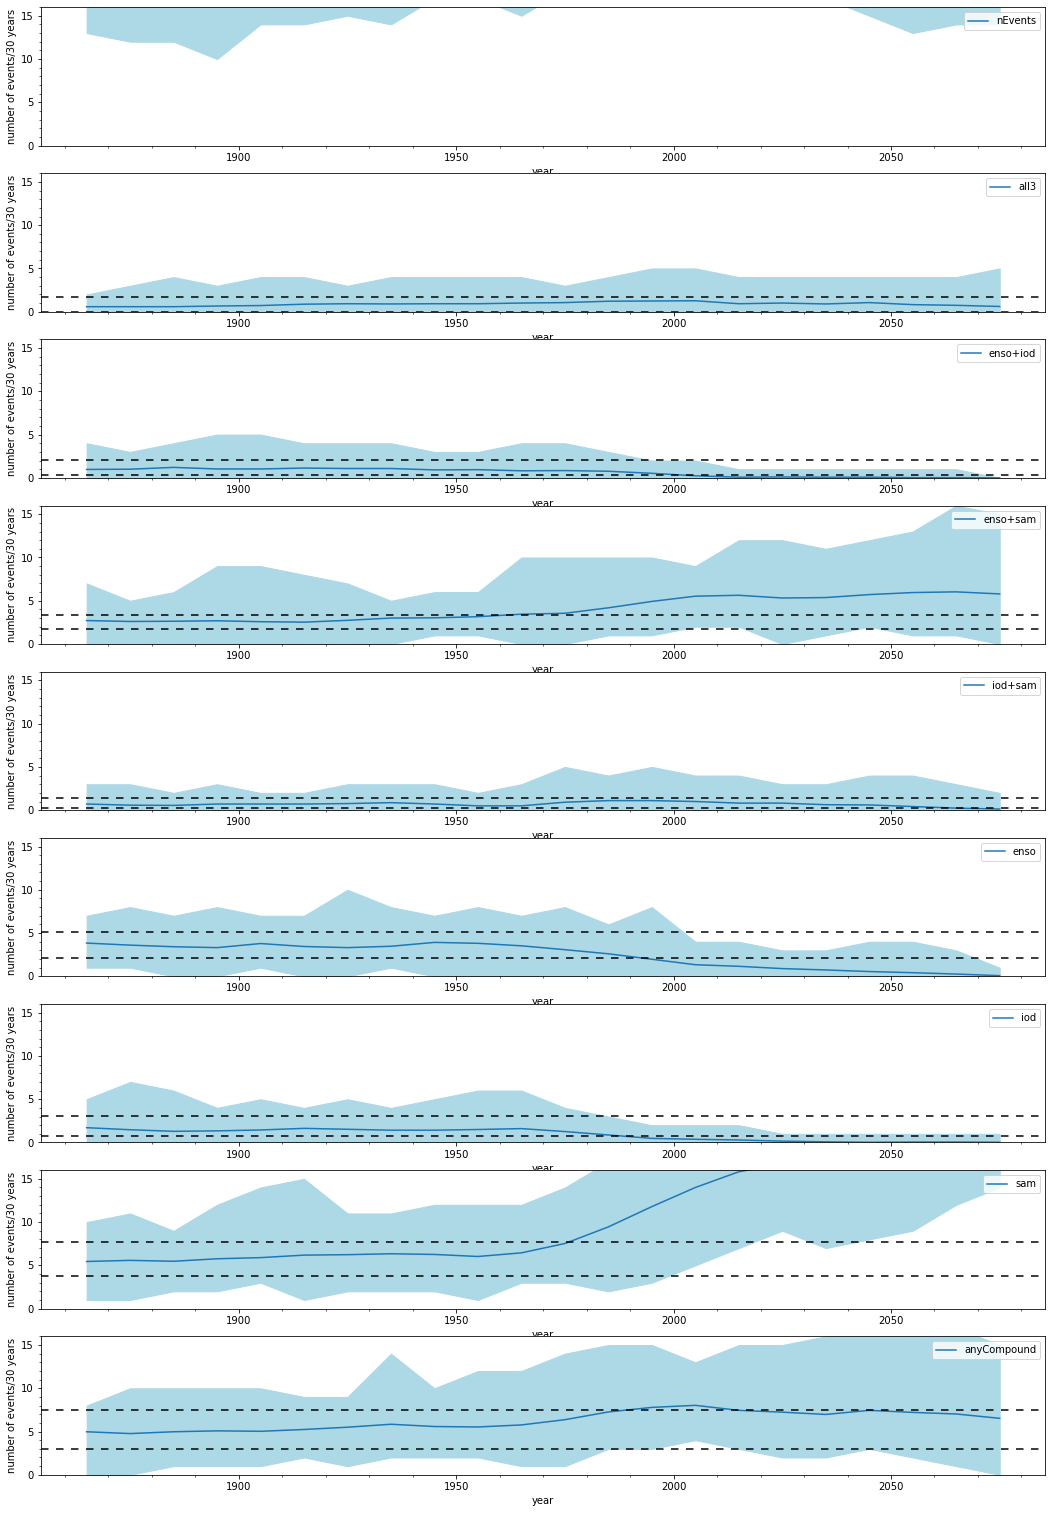

In [44]:
print(indexSet)
emergePlot(expBinSumXr[indexSet].sel(fire='neg', drop=True).to_dataset('compound'),
           piControlBinSumXr[indexSet].sel(fire='neg', drop=True).to_dataset('compound')
          )

In [46]:
ensoName={'nino34DmiSam':'nino34+sam',
          #'nino4DmiSam':'nino4+dmi',
          'ecCombinedDmiSam': 'ecCombined+sam',
         'cIndexDmiSam':'cIndex+sam',
          'eIndexDmiSam':'eIndex+sam'}

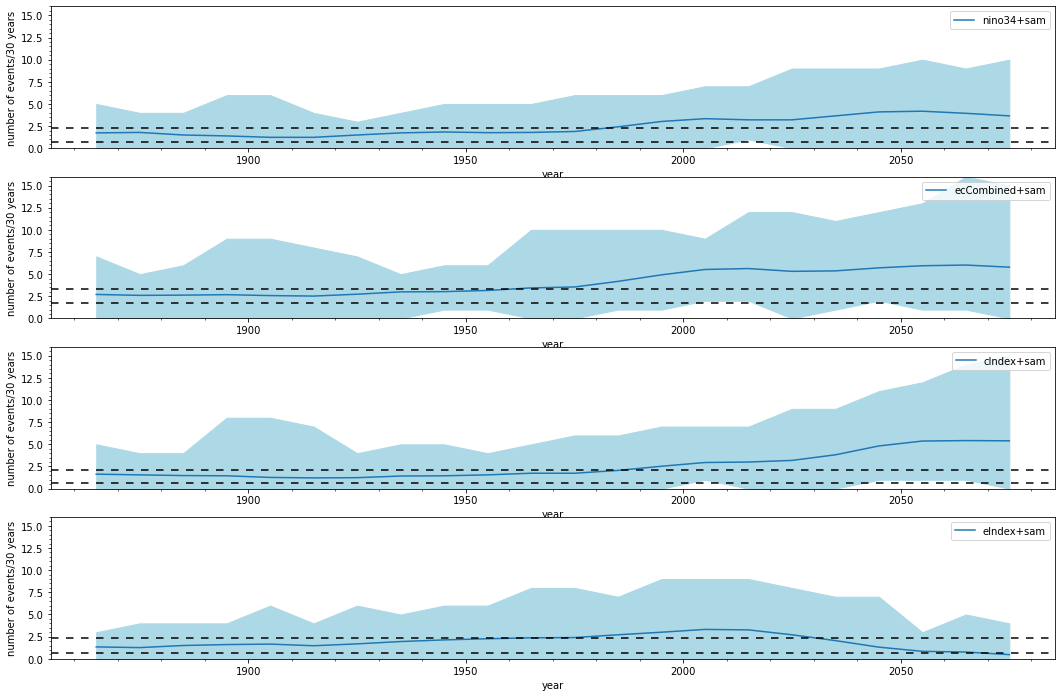

In [47]:
emergePlot(
expBinSumXr[list(ensoName.keys())].sel(compound='enso+sam',fire='neg',drop=True).rename_vars(ensoName),
piControlBinSumXr[list(ensoName.keys())].sel(compound='enso+sam',fire='neg',drop=True).rename_vars(ensoName))